In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from ast import literal_eval
from dfply import *

import geopandas as gpd

import plotnine
from plotnine import *
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import itertools

In [2]:
# copose the rules to select valid SSP-RCP combinations
rules = '''((X.ssp == 'SSP1')&(X.rcp == '26'))|
       ((X.ssp == 'SSP2')&(X.rcp == '45'))|
       ((X.ssp == 'SSP3')&(X.rcp == '60'))|
       ((X.ssp == 'SSP5')&(X.rcp == '85'))'''

rules = rules.replace('\n','').replace(' ','')

In [3]:
# # final productoin
# pred_actual_production_df_cities = pd.read_csv('../Step_2_Sort_GAEZ_layers/result_csv_with_CO2/pred_actual_production_df_cities.csv')\
#                   >> rename(Predict_production = 'Total Production',Predict_production_sd = 'Total Production sd')
# # the climate impacts
# climate_production_df_cites = pd.read_csv('../Step_2_Sort_GAEZ_layers/result_csv_with_CO2/climate_production_df_cites.csv')\
#                   >> rename(Climate_gap = 'Gap Production',Climate_gap_sd = 'Gap Production sd')
# # the technology impacts
# tech_production_df_cites = pd.read_csv('../Step_2_Sort_GAEZ_layers/result_csv_with_CO2/tech_production_df_cites.csv')\
#                   >> rename(Tech_gap = 'Gap Production', Tech_gap_sd = 'Gap Production sd')
# # the reclamation impacts
# reclamation_production_df_cites = pd.read_csv('../Step_2_Sort_GAEZ_layers/result_csv_with_CO2/reclamation_production_df_cites.csv')\
#                   >> rename(Reclamation_gap = 'Gap Production', Reclamation_gap_sd = 'Gap Production sd')
# # the urbanization impacts
# urban_production_df_cites = pd.read_csv('../Step_2_Sort_GAEZ_layers/result_csv_with_CO2/urban_production_df_cites.csv')\
#                   >> rename(Urban_gap = 'Gap Production', Urban_gap_sd = 'Gap Production sd')

# #  urban_gap: make the gap negative
# urban_production_df_cites['Urban_gap'] = -urban_production_df_cites['Urban_gap']

# # merge all production dfs
# production_with_impact_gaps = pred_actual_production_df_cities\
#                 .merge(climate_production_df_cites)\
#                 .merge(tech_production_df_cites)\
#                 .merge(reclamation_production_df_cites)\
#                 .merge(urban_production_df_cites)
           

In [4]:
# out_dfs = []
# grouped_df = production_with_impact_gaps.groupby(['Province','crop','water','rcp','ssp'])

# for idx,df in tqdm(grouped_df,total=len(grouped_df)):

#   # copy input_df
#   out_df = df.copy().sort_values('year')
#   out_df['final_year'] = df['year'] + 5

#   # get the production in 2020
#   prod_2020 = df[df['year']==2020]['Predict_production'].tolist()[0]

#   # compute the accumulate climate/tech impacts
#   out_df['accum_climate'] = out_df['Climate_gap'].cumsum()
#   out_df['accum_tech'] = out_df['Tech_gap'].cumsum()
#   out_df['accum_reclamation'] = out_df['Reclamation_gap'].cumsum()
#   out_df['accum_urban'] = out_df['Urban_gap'].cumsum()
  

#   # compute the confidence interval of accumulated impacts
#   out_df['accum_climate_bot'] = out_df['accum_climate'] - out_df['Climate_gap_sd']
#   out_df['accum_climate_top'] = out_df['accum_climate'] + out_df['Climate_gap_sd']
#   out_df['accum_tech_bot'] = out_df['accum_tech'] - out_df['Tech_gap_sd']
#   out_df['accum_tech_top'] = out_df['accum_tech'] + out_df['Tech_gap_sd']
#   out_df['accum_reclamation_bot'] = out_df['accum_reclamation'] - out_df['Reclamation_gap_sd']
#   out_df['accum_reclamation_top'] = out_df['accum_reclamation'] + out_df['Reclamation_gap_sd']
#   out_df['accum_urban_bot'] = out_df['accum_urban'] - out_df['Urban_gap_sd']
#   out_df['accum_urban_top'] = out_df['accum_urban'] + out_df['Urban_gap_sd']


#   # compute the final values imposed by climate/tech/urban/reclamation chronologicall
#   gaps_all = np.array([list(pair) for pair in zip(out_df['Climate_gap'],out_df['Tech_gap'],
#                              out_df['Urban_gap'],out_df['Reclamation_gap'])]).flatten()
#   gaps_all = np.insert(gaps_all,0,prod_2020)

#   gaps_chronologically = np.cumsum(gaps_all).tolist()[1:]

#   out_df['final_climate'] = gaps_chronologically[0::4]
#   out_df['final_tech'] = gaps_chronologically[1::4]
#   out_df['final_urban'] = gaps_chronologically[2::4]
#   out_df['final_reclamation'] = gaps_chronologically[3::4]

#   # get the uncertianties
#   out_df['final_climate_bot'] = out_df['final_climate'] - out_df['Climate_gap_sd']
#   out_df['final_climate_top'] = out_df['final_climate'] + out_df['Climate_gap_sd']
#   out_df['final_tech_bot'] = out_df['final_tech'] - out_df['Tech_gap_sd']
#   out_df['final_tech_top'] = out_df['final_tech'] + out_df['Tech_gap_sd']
#   out_df['final_reclamation_bot'] = out_df['final_reclamation'] - out_df['Reclamation_gap_sd']
#   out_df['final_reclamation_top'] = out_df['final_reclamation'] + out_df['Reclamation_gap_sd']
#   out_df['final_urban_bot'] = out_df['final_urban'] - out_df['Urban_gap_sd']
#   out_df['final_urban_top'] = out_df['final_urban'] + out_df['Urban_gap_sd']
  
#   # record the columns
#   out_df = out_df[['crop','water','Province','rcp', 'ssp', 'year','final_year',
#             'accum_climate','accum_climate_bot','accum_climate_top',
#             'accum_tech','accum_tech_bot','accum_tech_top',
#             'accum_urban','accum_urban_bot','accum_urban_top',
#             'accum_reclamation','accum_reclamation_bot','accum_reclamation_top',
#             'final_climate','final_climate_bot','final_climate_top',
#             'final_tech','final_tech_bot','final_tech_top',
#             'final_reclamation','final_reclamation_bot','final_reclamation_top',
#             'final_urban','final_urban_bot','final_urban_top']]

#   out_dfs.append(out_df)

  
# # concat all dfs in the list and save to disk
# production_city_crop_water_without_2020 = pd.concat(out_dfs).reset_index(drop=True)

  0%|          | 0/9120 [00:00<?, ?it/s]

In [5]:
# # get the production in 2020
# production_with_impact_gaps_2020 = production_with_impact_gaps \
#                     >> mask(X.year == 2020)\
#                     >> select(['crop','water','Province','rcp', 'ssp', 'year',
#                           'Predict_production','Predict_production_sd'])\
#                     >> mutate(final_urban=X.Predict_production,
#                        final_urban_bot = X.Predict_production - X.Predict_production_sd,
#                        final_urban_top = X.Predict_production + X.Predict_production_sd)\
#                     >> rename(final_year = 'year') >> drop(['Predict_production','Predict_production_sd'])

# # append 2020 records to the production_city_crop_water
# production_city_crop_water = pd.concat([production_with_impact_gaps_2020,production_city_crop_water_without_2020])

In [6]:
# # compute the net total production change
# production_city_crop_water['net_change'] = production_city_crop_water['accum_climate'] \
#                         + production_city_crop_water['accum_tech'] \
#                         + production_city_crop_water['accum_urban'] \
#                         + production_city_crop_water['accum_reclamation']

# production_city_crop_water['net_change_bot'] = production_city_crop_water['accum_climate_bot'] \
#                         + production_city_crop_water['accum_tech_bot'] \
#                         + production_city_crop_water['accum_urban_bot'] \
#                         + production_city_crop_water['accum_reclamation']

# production_city_crop_water['net_change_top'] = production_city_crop_water['accum_climate_top'] \
#                         + production_city_crop_water['accum_tech_top'] \
#                         + production_city_crop_water['accum_urban_top'] \
#                         + production_city_crop_water['accum_reclamation']

# # add scenario col
# production_city_crop_water['rcp'] = production_city_crop_water['rcp'].astype(str)
# production_city_crop_water['Scenario'] = production_city_crop_water.apply(lambda x:f"{x['ssp']}-{x['rcp']}",1)


# # change kt to million t
# cols_change = list(set(production_city_crop_water.columns) 
#             - set(['crop', 'water', 'Province', 'rcp', 'ssp', 'year', 'final_year','Scenario']))
# production_city_crop_water[cols_change] = production_city_crop_water[cols_change]/1e3

# # save to disk
# production_city_crop_water.to_csv(f'./result_csv/production_city_crop_water_with_CO2.csv',index=False)

In [9]:
# read crop production change data

# read population data
population = pd.read_csv('./result_csv/SSP_GDP_Pop_future_pred.csv')
population_total = population.groupby(['year','Scenario']).sum().reset_index() \
            >> rename(ssp='Scenario') \
            >> select(['ssp','year','Pop'])

# ========================= Without CO2 ===============================
production_city_crop_water_no_CO2 = pd.read_csv('./result_csv/production_city_crop_water.csv')
production_city_crop_water_no_CO2['rcp'] = production_city_crop_water_no_CO2['rcp'].astype(str)

# compute the total production aggregated from all cities (kt)
production_city_crop_water_total_no_CO2 = production_city_crop_water_no_CO2.fillna(0)\
                                             .groupby(['rcp','ssp','year','final_year','Scenario'])\
                                             .sum().reset_index()

# selecet the necessary cols
production_city_crop_water_total_no_CO2 = production_city_crop_water_total_no_CO2\
                   >> mask(eval(rules))\
                   >> drop('year') >> rename(year='final_year')

# ========================= Without CO2 ===============================
production_city_crop_water_with_CO2 = pd.read_csv('./result_csv/production_city_crop_water_with_CO2.csv')
production_city_crop_water_with_CO2['rcp'] = production_city_crop_water_with_CO2['rcp'].astype(str)

# compute the total production aggregated from all cities (kt)
production_city_crop_water_total_with_CO2 = production_city_crop_water_with_CO2.fillna(0)\
                                             .groupby(['rcp','ssp','year','final_year','Scenario'])\
                                             .sum().reset_index()

# selecet the necessary cols
production_city_crop_water_total_with_CO2 = production_city_crop_water_total_with_CO2\
                   >> mask(eval(rules))\
                   >> drop('year') >> rename(year='final_year')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12388\1889434067.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12388\1889434067.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12388\1889434067.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


##### 2-1) Compute the total and per capita crop production

In [10]:
# ========================= Without CO2 ===============================

# merge production with population
production_population_merge_no_CO2 = production_city_crop_water_total_no_CO2.merge(population_total)

# compute the kt/person crop possesing 
production_population_merge_no_CO2['pp_production_kg'] = (production_population_merge_no_CO2['final_urban'] *1e6 * 1_000)\
                            /(production_population_merge_no_CO2['Pop'] * 10_000)
production_population_merge_no_CO2['pp_production_bot_kg'] = (production_population_merge_no_CO2['final_urban_bot'] *1e6 * 1_000)\
                            /(production_population_merge_no_CO2['Pop'] * 10_000)
production_population_merge_no_CO2['pp_production_top_kg'] = (production_population_merge_no_CO2['final_urban_top'] *1e6 * 1_000)\
                            /(production_population_merge_no_CO2['Pop'] * 10_000)


# ========================= With CO2 ===============================

# merge production with population
production_population_merge_no_CO2 = production_city_crop_water_total_no_CO2.merge(population_total)

# compute the kt/person crop possesing 
production_population_merge_no_CO2['pp_production_kg'] = (production_population_merge_no_CO2['final_urban'] *1e6 * 1_000)\
                            /(production_population_merge_no_CO2['Pop'] * 10_000)
production_population_merge_no_CO2['pp_production_bot_kg'] = (production_population_merge_no_CO2['final_urban_bot'] *1e6 * 1_000)\
                            /(production_population_merge_no_CO2['Pop'] * 10_000)
production_population_merge_no_CO2['pp_production_top_kg'] = (production_population_merge_no_CO2['final_urban_top'] *1e6 * 1_000)\
                            /(production_population_merge_no_CO2['Pop'] * 10_000)

### compute the mean production change

In [11]:
# ========================= Without CO2 ===============================

# compute the total crop production from city level records
production_city_df_no_CO2 = production_city_crop_water_no_CO2.groupby(['rcp','ssp','year','final_year']).sum().reset_index()

# make cols for coloring
production_city_df_no_CO2['color_net'] = 'Net Change'
production_city_df_no_CO2['color_climate'] = 'Climate'
production_city_df_no_CO2['color_tech'] = 'Technology'
production_city_df_no_CO2['color_reclamation'] = 'Reclamation'
production_city_df_no_CO2['color_urban'] = 'Urbanization'

# make scenario form rcp-ssp
production_city_df_no_CO2['rcp'] = production_city_df_no_CO2['rcp'].astype(str)
production_city_df_no_CO2['Scenario'] = production_city_df_no_CO2.apply(lambda x:f"{x['ssp']}-{x['rcp']}",1)

# select the tier-1 ssp-rcp comninations
production_city_df_masked_no_CO2 = production_city_df_no_CO2 >> mask(eval(rules))

# get the mean values for all scenarios
production_city_df_masked_mean_scenario_no_co2 = production_city_df_masked_no_CO2.groupby(['year','final_year']).mean().reset_index()
production_city_df_masked_mean_scenario_no_co2['color_net'] = 'Net Change'
production_city_df_masked_mean_scenario_no_co2['color_climate'] = 'Climate'
production_city_df_masked_mean_scenario_no_co2['color_tech'] = 'Technology'
production_city_df_masked_mean_scenario_no_co2['color_reclamation'] = 'Reclamation'
production_city_df_masked_mean_scenario_no_co2['color_urban'] = 'Urbanization'

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12388\1984497734.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12388\1984497734.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [12]:
# ========================= With CO2 ===============================

# compute the total crop production from city level records
production_city_df_with_CO2 = production_city_crop_water_with_CO2.groupby(['rcp','ssp','year','final_year']).sum().reset_index()

# make cols for coloring
production_city_df_with_CO2['color_net'] = 'Net Change'
production_city_df_with_CO2['color_climate'] = 'Climate'
production_city_df_with_CO2['color_tech'] = 'Technology'
production_city_df_with_CO2['color_reclamation'] = 'Reclamation'
production_city_df_with_CO2['color_urban'] = 'Urbanization'

# make scenario form rcp-ssp
production_city_df_with_CO2['rcp'] = production_city_df_with_CO2['rcp'].astype(str)
production_city_df_with_CO2['Scenario'] = production_city_df_with_CO2.apply(lambda x:f"{x['ssp']}-{x['rcp']}",1)

# select the tier-1 ssp-rcp comninations
production_city_df_masked_with_CO2 = production_city_df_with_CO2 >> mask(eval(rules))

# get the mean values for all scenarios
production_city_df_masked_mean_scenario_with_CO2 = production_city_df_masked_with_CO2.groupby(['year','final_year']).mean().reset_index()
production_city_df_masked_mean_scenario_with_CO2['color_net'] = 'Net Change'
production_city_df_masked_mean_scenario_with_CO2['color_climate'] = 'Climate'
production_city_df_masked_mean_scenario_with_CO2['color_tech'] = 'Technology'
production_city_df_masked_mean_scenario_with_CO2['color_reclamation'] = 'Reclamation'
production_city_df_masked_mean_scenario_with_CO2['color_urban'] = 'Urbanization'

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12388\1093382634.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12388\1093382634.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [16]:
# concat With/Without CO2
production_city_df_masked_mean_scenario_with_CO2['CO2'] = 'With CO2'
production_city_df_masked_mean_scenario_no_co2['CO2'] = 'Without CO2'

production_city_df_masked_mean_scenario = pd.concat([production_city_df_masked_mean_scenario_with_CO2,
                                                    production_city_df_masked_mean_scenario_no_co2])

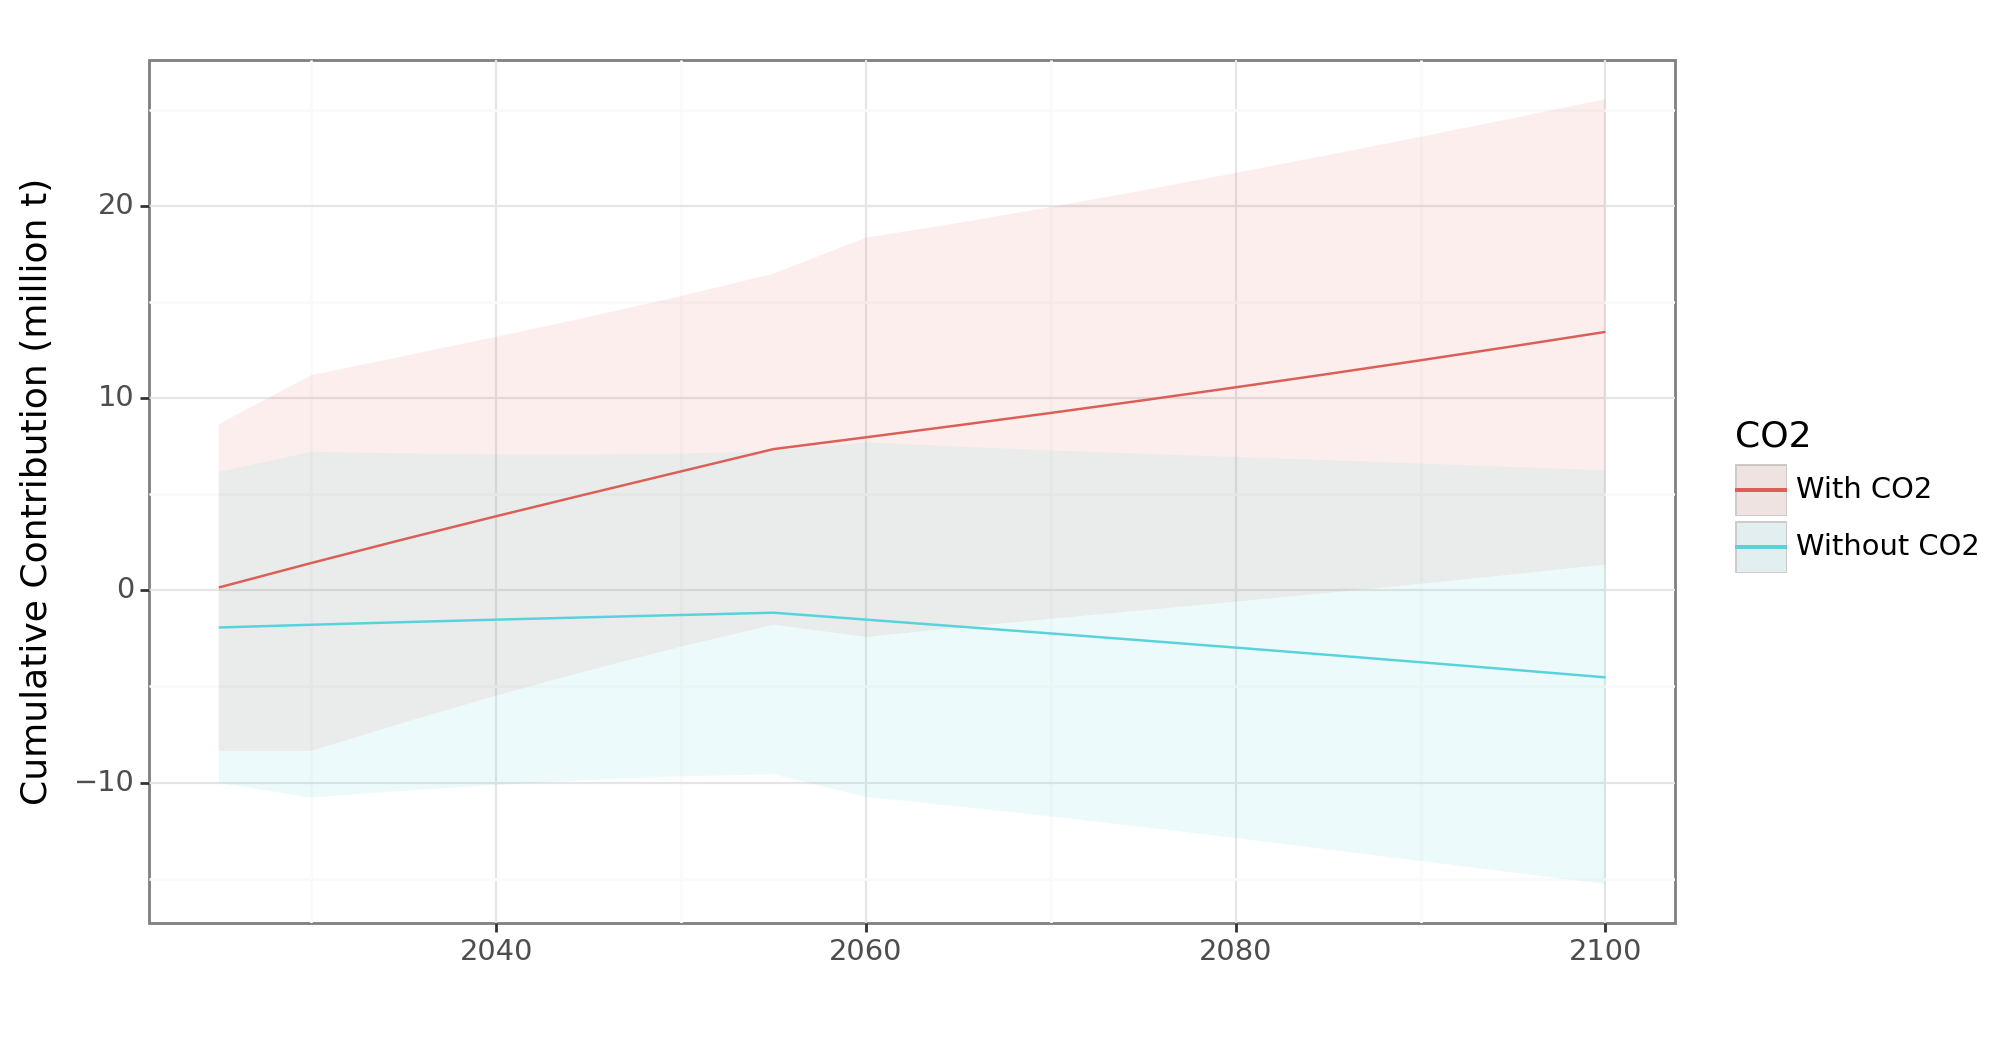

<Figure Size: (1000 x 530)>

In [21]:
# plot the yearbook/GAEZ/GYGA data
plotnine.options.figure_size = (10, 5.3)
plotnine.options.dpi = 100

g = (ggplot(production_city_df_masked_mean_scenario) +
 geom_ribbon(aes(x='final_year',
          ymin='accum_climate_bot',
          ymax='accum_climate_top',fill='CO2'),alpha=0.1) +
 geom_line(aes(x='final_year',y='accum_climate',color='CO2')) +
 theme_bw(base_size=13) + 
 ylab('Cumulative Contribution (million t)') +
 xlab(' ') 
)

# show fig
g

In [22]:
g.save('../Figs/fig_review_02_climate_impact_CO2_difference.svg')

C:\ProgramData\Miniconda3\envs\gis\lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 10 x 5.3 in image.
C:\ProgramData\Miniconda3\envs\gis\lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: ../Figs/fig_review_02_climate_impact_CO2_difference.svg
